In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import axes
import math
fullData = np.array([[3,3,2,2,6,6,7,7,8,7],[5,4,8,3,2,4,3,4,5,6]],dtype="float64")
centroid = np.array([[4,5],[6,4]],dtype="float64")
print(fullData.shape)
print(centroid.shape)

(2, 10)
(2, 2)


This is for Task 1

In [333]:
def manhattan(data,centroid,i,j,X):
  total = 0
  for k in range(X):
    total = total + abs(data[k][i]-centroid[k][j])
  return total
def groupingM(centroid, data):
    assigned_centroid = np.zeros((len(data[0]),1),dtype="float64")
    for i in range(len(data[0])):
        distance=np.zeros((len(centroid[0]),1),dtype="float64")
        for j in range(len(centroid[0])):
            distance[j] = manhattan(data,centroid,i,j,len(centroid))
        assigned_centroid[i]=np.argmin(distance)
    return assigned_centroid

In [12]:
def centroidRedefiner(clusterList,data,centroids):
  newCentroids = np.zeros(centroids.shape,dtype="float64")
  for i in range(len(centroids[0])):
    number = 0
    cumulative = np.zeros((len(centroids),1),dtype="float64")
    for j in range(len(clusterList)):
      if(clusterList[j] == i):
        number = number + 1
        for k in range(len(cumulative)):
          cumulative[k] = cumulative[k] + data[k][j]
    for k in range(len(cumulative)):
      newCentroids[k][i] = cumulative[k] / number
  return newCentroids

list of new centroids:
(4.000000, 6.333333)
(5.571429, 3.571429)


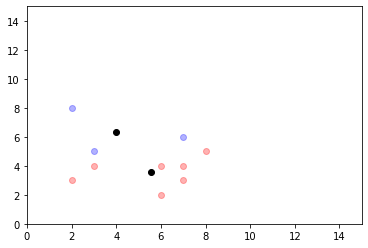

In [335]:
#(1)
clusterList = groupingM(centroid, fullData)
Centroids = centroidRedefiner(clusterList, fullData,centroid)
print("list of new centroids:")
for i in range(len(Centroids[0])):
  print("(%f, %f)"%(Centroids[0][i],Centroids[1][i]))
plt.figure
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([0,15])
plt.scatter(np.array(Centroids)[0,:], np.array(Centroids)[1,:], color='black')
for i in range(len(fullData[0])):
  if(clusterList[i] == 0):
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'blue')
  else:
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'red')
plt.show()

In [10]:
def euclidian(data,centroid,i,j,X):
  import math
  total = 0
  for k in range(X):
    total = total + pow((centroid[k][j]-data[k][i]),2)
  return math.sqrt(total)
def groupingE(centroid, data):
    assigned_centroid = np.zeros((len(data[0]),1),dtype="float64")
    for i in range(len(data[0])):
        distance=np.zeros((len(centroid[0]),1),dtype="float64")
        for j in range(len(centroid[0])):
            distance[j] = euclidian(data,centroid,i,j,len(centroid))
        assigned_centroid[i]=np.argmin(distance)
    return assigned_centroid

list of new centroids:
(2.500000, 6.500000)
(5.750000, 3.875000)


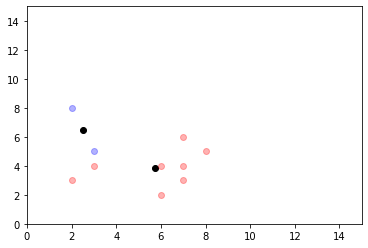

In [337]:
#(2)
clusterList = groupingE(centroid, fullData)
Centroids = centroidRedefiner(clusterList, fullData,centroid)
print("list of new centroids:")
for i in range(len(Centroids[0])):
  print("(%f, %f)"%(Centroids[0][i],Centroids[1][i]))
plt.figure
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([0,15])
plt.scatter(np.array(Centroids)[0,:], np.array(Centroids)[1,:], color='black')
for i in range(len(fullData[0])):
  if(clusterList[i] == 0):
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'blue')
  else:
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'red')
plt.show()

list of new centroids:
(2.500000, 5.000000)
(6.833333, 4.000000)


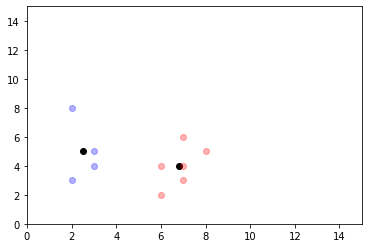

In [338]:
#(3)
centroid = np.array([[3,8],[3,3]],dtype="float64")
clusterList = groupingM(centroid, fullData)
Centroids = centroidRedefiner(clusterList, fullData,centroid)
print("list of new centroids:")
for i in range(len(Centroids[0])):
  print("(%f, %f)"%(Centroids[0][i],Centroids[1][i]))
plt.figure
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([0,15])
plt.scatter(np.array(Centroids)[0,:], np.array(Centroids)[1,:], color='black')
for i in range(len(fullData[0])):
  if(clusterList[i] == 0):
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'blue')
  else:
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'red')
plt.show()

list of new centroids:
(4.857143, 3.571429)
(5.666667, 6.333333)


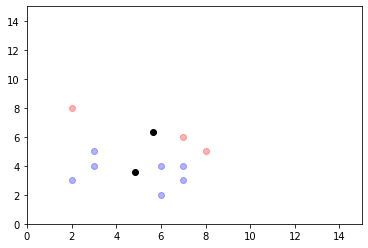

In [339]:
#(4)
centroid = np.array([[3,4],[2,8]],dtype="float64")
clusterList = groupingM(centroid, fullData)
Centroids = centroidRedefiner(clusterList, fullData,centroid)
print("list of new centroids:")
for i in range(len(Centroids[0])):
  print("(%f, %f)"%(Centroids[0][i],Centroids[1][i]))
plt.figure
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([0,15])
plt.scatter(np.array(Centroids)[0,:], np.array(Centroids)[1,:], color='black')
for i in range(len(fullData[0])):
  if(clusterList[i] == 0):
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'blue')
  else:
    plt.scatter(fullData[0,i], fullData[1,i], alpha=0.3, color = 'red')
plt.show()

This is for Task 2

In [9]:
import random
def createCentroids(data,K):
  random.seed(1)
  indeces = random.sample(range(0, len(data[0])), K)
  centroids = []
  for i in range(K):
    centroids.append(data[:,indeces[i]])
  centroids = np.array(centroids)
  centroids = centroids.T
  return centroids
def SSE(clusterList,data,centroids):
  newCentroids = np.zeros(centroids.shape,dtype="float64")
  for i in range(len(centroids[0])):
    number = 0
    cumulative = np.zeros((len(centroids),1),dtype="float64")
    for j in range(len(clusterList)):
      if(clusterList[j] == i):
        number = number + 1
        for k in range(len(cumulative)):
          cumulative[k] = cumulative[k] + pow((data[k][j] - centroids[k][i]),2)
    for k in range(len(cumulative)):
      newCentroids[k][i] = cumulative[k]
  return newCentroids
  

In [8]:
def cosine(data,centroid,i,j,X):
  import math
  total = np.dot(centroid[:,j],data[:,i])/(np.linalg.norm(centroid[:,j])*np.linalg.norm(data[:,i]))
  return 1-total
def groupingC(centroid, data):
    assigned_centroid = np.zeros((len(data[0]),1),dtype="float64")
    for i in range(len(data[0])):
        distance=np.zeros((len(centroid[0]),1),dtype="float64")
        for j in range(len(centroid[0])):
            distance[j] = cosine(data,centroid,i,j,len(centroid))
        assigned_centroid[i]=np.argmin(distance)
    return assigned_centroid

In [16]:
def jackard(data,centroid,i,j,X):
  import math
  mi = 0
  ma = 0
  for k in range(X):
    mi = mi + min(centroid[k,j],data[k,i])
    ma = ma + max(centroid[k,j],data[k,i])
  return 1-(mi/ma)
def groupingJ(centroid, data):
    assigned_centroid = np.zeros((len(data[0]),1),dtype="float64")
    for i in range(len(data[0])):
        distance=np.zeros((len(centroid[0]),1),dtype="float64")
        for j in range(len(centroid[0])):
            distance[j] = jackard(data,centroid,i,j,len(centroid))
        assigned_centroid[i]=np.argmin(distance)
    return assigned_centroid

In [35]:
# Q1
irisData = np.array(pd.read_csv("/content/iris.data"))
irisData = irisData.T
irisData = irisData[:4]
centroids = createCentroids(irisData,3)
clusterListE = groupingE(centroids, irisData)
Centroids = centroidRedefiner(clusterListE, irisData,centroids)
error = SSE(clusterList, irisData,Centroids)
print("list of new centroids(Euclidian):")
for i in range(len(Centroids[0])):
  print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Euclidian):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))

centroids = createCentroids(irisData,3)
clusterListC = groupingC(centroids, irisData)
Centroids = centroidRedefiner(clusterListC, irisData,centroids)
error = SSE(clusterList, irisData,Centroids)
print("\n\nlist of new centroids(Cosine):")
for i in range(len(Centroids[0])):
  print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Euclidian):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))

centroids = createCentroids(irisData,3)
clusterListJ = groupingJ(centroids, irisData)
Centroids = centroidRedefiner(clusterListJ, irisData,centroids)
error = SSE(clusterList, irisData,Centroids)
print("\n\nlist of new centroids(Jarcard):")
for i in range(len(Centroids[0])):
  print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Euclidian):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))

list of new centroids(Euclidian):
(4.704762, 3.095238, 1.385714, 0.190476)
(6.287755, 2.880612, 4.941837, 1.688776)
(5.213333, 3.576667, 1.633333, 0.336667)

Sum of Squared error for each column(Euclidian):
(0.958549, 1.076644, 0.485510, 0.066100)
(43.561933, 10.969017, 67.604827, 17.878721)
(2.199822, 2.361122, 1.135556, 0.448322)


list of new centroids(Cosine):
(5.036364, 3.154545, 1.390909, 0.172727)
(6.262000, 2.872000, 4.906000, 1.676000)
(4.994737, 3.492105, 1.486842, 0.265789)

Sum of Squared error for each column(Euclidian):
(3.088264, 1.183140, 0.486198, 0.068512)
(43.495600, 10.961600, 67.476400, 17.862400)
(3.503961, 2.919702, 0.800810, 0.386572)


list of new centroids(Jarcard):
(4.710000, 3.080000, 1.385000, 0.185000)
(6.262000, 2.872000, 4.906000, 1.676000)
(5.206897, 3.648276, 1.520690, 0.286207)

Sum of Squared error for each column(Euclidian):
(0.958000, 1.072000, 0.485500, 0.065500)
(43.495600, 10.961600, 67.476400, 17.862400)
(2.198621, 2.212414, 0.767586, 0.374483)

In [49]:
#Q2
def stats(data,clusterList,K):
  statList = np.zeros((2,K),dtype="float64")
  for i in range(K):
    counter = np.zeros((K,1),dtype="int")
    for j in range(len(clusterList)):
      if(clusterList[j] == i):
        if(data[4][j] == "Iris-setosa"):
          counter[0] = counter[0] + 1
        if(data[4][j] == "Iris-versicolor"):
          counter[1] = counter[1] + 1
        if(data[4][j] == "Iris-virginica"):
          counter[2] = counter[2] + 1
    print()
    print(counter)
    statList[0][i] = np.argmax(counter)
    statList[1][i] = counter[np.argmax(counter)]/np.sum(counter)
  return statList
irisData = np.array(pd.read_csv("/content/iris.data"))
irisData = irisData.T
statE = stats(irisData,clusterListE,3)
lister = ["Iris Setosa","Iris Versicolour","Iris Virginica"]
print("\n\nEuclidian Results:  ")
for i in range(len(statE[0])):
  print("%s  %f"%(lister[int(statE[0][i])],statE[1][i])) 
statC = stats(irisData,clusterListC,3)
print("\n\nCosine Results:  ")
for i in range(len(statC[0])):
  print("%s  %f"%(lister[int(statC[0][i])],statC[1][i])) 
statJ = stats(irisData,clusterListJ,3)
print("\n\nJaccard Results:  ")
for i in range(len(statJ[0])):
  print("%s  %f"%(lister[int(statJ[0][i])],statJ[1][i])) 


[[21]
 [ 0]
 [ 0]]

[[ 0]
 [48]
 [50]]

[[28]
 [ 2]
 [ 0]]


Euclidian Results:  
Iris Setosa  1.000000
Iris Virginica  0.510204
Iris Setosa  0.933333

[[11]
 [ 0]
 [ 0]]

[[ 0]
 [50]
 [50]]

[[38]
 [ 0]
 [ 0]]


Cosine Results:  
Iris Setosa  1.000000
Iris Versicolour  0.500000
Iris Setosa  1.000000

[[20]
 [ 0]
 [ 0]]

[[ 0]
 [50]
 [50]]

[[29]
 [ 0]
 [ 0]]


Jaccard Results:  
Iris Setosa  1.000000
Iris Versicolour  0.500000
Iris Setosa  1.000000


In [345]:
# Q3
irisData = np.array(pd.read_csv("/content/iris.data"))
irisData = irisData.T
irisData = irisData[:4]
centroids = createCentroids(irisData,3)
for i in range(10):
  clusterList = groupingE(centroids, irisData)
  Centroids = centroidRedefiner(clusterList, irisData,centroids)
  centroids = Centroids
  error = SSE(clusterList, irisData,Centroids)
  print("\n\nlist of new centroids(Euclidian):")
  for i in range(len(Centroids[0])):
    print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Euclidian):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))

centroids = createCentroids(irisData,3)
for i in range(10): 
  clusterList = groupingC(centroids, irisData)
  Centroids = centroidRedefiner(clusterList, irisData,centroids)
  centroids = Centroids
  error = SSE(clusterList, irisData,Centroids)
  print("\n\nlist of new centroids(Cosine):")
  for i in range(len(Centroids[0])):
    print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Cosine):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))

centroids = createCentroids(irisData,3)
for i in range(10):
  clusterList = groupingJ(centroids, irisData)
  Centroids = centroidRedefiner(clusterList, irisData,centroids)
  centroids = Centroids
  error = SSE(clusterList, irisData,Centroids)
  print("\n\nlist of new centroids(Jaccard):")
  for i in range(len(Centroids[0])):
    print("(%f, %f, %f, %f)"%(Centroids[0][i],Centroids[1][i],Centroids[2][i],Centroids[3][i]))
print("\nSum of Squared error for each column(Jaccard):")
for i in range(len(error[0])):
  print("(%f, %f, %f, %f)"%(error[0][i],error[1][i],error[2][i],error[3][i]))



list of new centroids(Euclidian):
(4.704762, 3.095238, 1.385714, 0.190476)
(6.287755, 2.880612, 4.941837, 1.688776)
(5.213333, 3.576667, 1.633333, 0.336667)


list of new centroids(Euclidian):
(4.709091, 3.109091, 1.395455, 0.190909)
(6.301031, 2.886598, 4.958763, 1.695876)
(5.220000, 3.540000, 1.690000, 0.363333)


list of new centroids(Euclidian):
(4.709091, 3.109091, 1.395455, 0.190909)
(6.301031, 2.886598, 4.958763, 1.695876)
(5.220000, 3.540000, 1.690000, 0.363333)


list of new centroids(Euclidian):
(4.709091, 3.109091, 1.395455, 0.190909)
(6.301031, 2.886598, 4.958763, 1.695876)
(5.220000, 3.540000, 1.690000, 0.363333)


list of new centroids(Euclidian):
(4.709091, 3.109091, 1.395455, 0.190909)
(6.301031, 2.886598, 4.958763, 1.695876)
(5.220000, 3.540000, 1.690000, 0.363333)


list of new centroids(Euclidian):
(4.709091, 3.109091, 1.395455, 0.190909)
(6.301031, 2.886598, 4.958763, 1.695876)
(5.220000, 3.540000, 1.690000, 0.363333)


list of new centroids(Euclidian):
(4.709091,